# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [28]:
# Import the titanic dataset here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_dir = "https://dlsun.github.io/pods/data/titanic.csv"
df_titanic = pd.read_csv(data_dir)
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [29]:
# Code here
# filter data to include passengers only
df_passengers = df_titanic[df_titanic['class'].isin(['1st', '2nd', '3rd'])]

# joint distribution (crosstab)
pd.crosstab(df_passengers['class'], df_passengers['embarked'], normalize=True)


embarked,B,C,Q,S
class,,,,
1st,0.002278,0.108580,0.002278,0.132878
2nd,0.004556,0.019742,0.005315,0.186029
3rd,0.000000,0.077449,0.085801,0.375095


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
0.696756
* What proportion of Southampton passengers were in 3rd class?
0.540481

In [30]:
# Code here
# given embarked
df_passengers.groupby("embarked")["class"].value_counts(normalize=True)

embarked  class
B         2nd      0.666667
          1st      0.333333
C         1st      0.527675
          3rd      0.376384
          2nd      0.095941
Q         3rd      0.918699
          2nd      0.056911
          1st      0.024390
S         3rd      0.540481
          2nd      0.268053
          1st      0.191466
Name: proportion, dtype: float64

In [31]:
# given class
df_passengers.groupby("class")["embarked"].value_counts(normalize=True)

class  embarked
1st    S           0.540123
       C           0.441358
       B           0.009259
       Q           0.009259
2nd    S           0.862676
       C           0.091549
       Q           0.024648
       B           0.021127
3rd    S           0.696756
       Q           0.159379
       C           0.143865
Name: proportion, dtype: float64

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

<Axes: xlabel='class'>

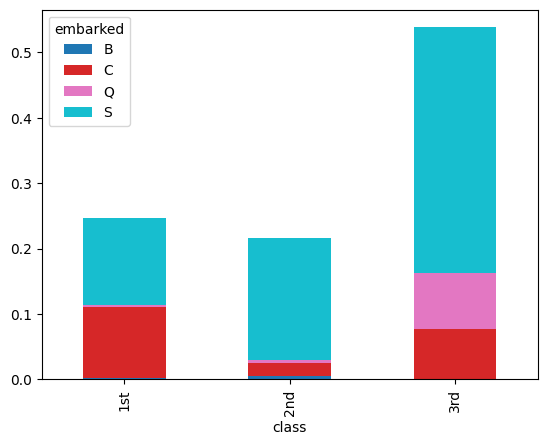

In [32]:
# Code here
# plot showing distribution of passenger's class, given where they embarked
pd.crosstab(df_passengers['class'], df_passengers['embarked'], normalize=True).plot(kind='bar', stacked=True, cmap='tab10')